# Обучение моделей

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Для-YNDX" data-toc-modified-id="Для-YNDX-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Для YNDX</a></span><ul class="toc-item"><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor

In [2]:
data = pd.read_csv("fin_quotes_per_day.csv")

In [3]:
data

,Date,GAZP,YNDX,RUAL,IRAO,GMKN,LKOH,MGNT,MTSS,NVTK,PLZL,ROSN,SBER,SNGS,TATN,CHMF
0,2015-03-30,137.00,887.0,37.340,1.0450,10530.0,2657.0,11185.0,246.30,432.0,1028.0,247.50,63.01,35.690,278.9,657.00
1,2015-03-31,138.90,893.0,36.790,1.0999,10399.0,2705.0,11350.0,247.00,432.0,1016.5,252.15,62.88,35.100,287.0,658.00
2,2015-04-01,143.00,902.0,35.825,1.1200,10539.0,2755.0,11750.0,250.90,450.3,1028.0,261.35,64.50,35.990,300.1,644.50
3,2015-04-02,143.90,919.0,36.450,1.1034,10090.0,2780.5,11971.0,250.00,467.2,1011.0,262.55,65.92,37.000,301.5,643.00
4,2015-04-03,143.94,940.0,36.720,1.1050,10237.0,2824.8,11799.0,248.60,476.4,1013.0,263.70,65.50,36.690,299.0,641.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2157,2023-11-16,165.48,2569.0,39.035,4.2140,17008.0,7135.5,5823.0,271.05,1538.2,11207.0,572.75,279.70,31.175,602.1,1350.80
2158,2023-11-17,165.31,2572.0,39.040,4.2230,17168.0,7225.5,5903.5,269.05,1536.0,11220.0,583.30,281.60,32.305,615.5,1351.00
2159,2023-11-20,165.51,2573.4,39.000,4.2570,17098.0,7194.5,5931.0,269.95,1545.6,11209.0,581.50,282.91,32.040,615.4,1332.40
2160,2023-11-21,165.15,2572.6,38.915,4.2980,17250.0,7209.0,5952.0,272.85,1539.0,11338.5,583.40,282.79,32.345,634.2,1327.00


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2162 entries, 0 to 2161
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2162 non-null   object 
 1   GAZP    2162 non-null   float64
 2   YNDX    2162 non-null   float64
 3   RUAL    2162 non-null   float64
 4   IRAO    2162 non-null   float64
 5   GMKN    2162 non-null   float64
 6   LKOH    2162 non-null   float64
 7   MGNT    2162 non-null   float64
 8   MTSS    2162 non-null   float64
 9   NVTK    2162 non-null   float64
 10  PLZL    2162 non-null   float64
 11  ROSN    2162 non-null   float64
 12  SBER    2162 non-null   float64
 13  SNGS    2162 non-null   float64
 14  TATN    2162 non-null   float64
 15  CHMF    2162 non-null   float64
dtypes: float64(15), object(1)
memory usage: 270.4+ KB


In [5]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
data

,GAZP,YNDX,RUAL,IRAO,GMKN,LKOH,MGNT,MTSS,NVTK,PLZL,ROSN,SBER,SNGS,TATN,CHMF
Date,,,,,,,,,,,,,,,
2015-03-30,137.00,887.0,37.340,1.0450,10530.0,2657.0,11185.0,246.30,432.0,1028.0,247.50,63.01,35.690,278.9,657.00
2015-03-31,138.90,893.0,36.790,1.0999,10399.0,2705.0,11350.0,247.00,432.0,1016.5,252.15,62.88,35.100,287.0,658.00
2015-04-01,143.00,902.0,35.825,1.1200,10539.0,2755.0,11750.0,250.90,450.3,1028.0,261.35,64.50,35.990,300.1,644.50
2015-04-02,143.90,919.0,36.450,1.1034,10090.0,2780.5,11971.0,250.00,467.2,1011.0,262.55,65.92,37.000,301.5,643.00
2015-04-03,143.94,940.0,36.720,1.1050,10237.0,2824.8,11799.0,248.60,476.4,1013.0,263.70,65.50,36.690,299.0,641.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-16,165.48,2569.0,39.035,4.2140,17008.0,7135.5,5823.0,271.05,1538.2,11207.0,572.75,279.70,31.175,602.1,1350.80
2023-11-17,165.31,2572.0,39.040,4.2230,17168.0,7225.5,5903.5,269.05,1536.0,11220.0,583.30,281.60,32.305,615.5,1351.00
2023-11-20,165.51,2573.4,39.000,4.2570,17098.0,7194.5,5931.0,269.95,1545.6,11209.0,581.50,282.91,32.040,615.4,1332.40


## Для YNDX

In [6]:
def code_mean(data, cat_feature, real_feature):
    return dict(data.groupby(cat_feature)[real_feature].mean())

In [7]:
def preprocess_data(data, target, lag_start, lag_end, test_size):

    data = pd.DataFrame(data.copy())

    # считаем индекс в датафрейме, после которого начинается тестовый отрезок
    test_index = int(len(data) * (1 - test_size))
    # добавляем лаги исходного ряда в качестве признаков
    for i in range(lag_start, lag_end):
        data[f"lag_{i}"] = data[target].shift(i)

    data["day"] = data.index.day

    # считаем средние только по тренировочной части, чтобы избежать лика
    data["day_average"] = list(map(code_mean(data[:test_index], "day", target).get, data.day))

    # выкидываем закодированные средними признаки
    data.drop(["day"], axis=1, inplace=True)

    data = data.dropna()
    data = data.reset_index(drop=True)

    # разбиваем весь датасет на тренировочную и тестовую выборку
    X_train = data.loc[:test_index].drop([target], axis=1)
    y_train = data.loc[:test_index][target]
    X_test = data.loc[test_index:].drop([target], axis=1)
    y_test = data.loc[test_index:][target]

    return X_train, X_test, y_train, y_test

In [8]:
X_train, X_test, y_train, y_test = preprocess_data(data['YNDX'], target='YNDX', test_size=0.25, lag_start=3, lag_end=14)

X_train

,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,day_average
0,941.0,940.0,939.0,946.0,942.0,934.0,940.0,919.0,902.0,893.0,887.0,2398.612727
1,910.0,941.0,940.0,939.0,946.0,942.0,934.0,940.0,919.0,902.0,893.0,2362.529630
2,973.0,910.0,941.0,940.0,939.0,946.0,942.0,934.0,940.0,919.0,902.0,2342.485965
3,1028.0,973.0,910.0,941.0,940.0,939.0,946.0,942.0,934.0,940.0,919.0,2306.756364
4,1053.0,1028.0,973.0,910.0,941.0,940.0,939.0,946.0,942.0,934.0,940.0,2269.089091
...,...,...,...,...,...,...,...,...,...,...,...,...
1617,5973.0,5939.2,5868.4,5735.0,5712.6,5690.8,5804.0,5732.6,5636.4,5699.6,5615.0,2362.529630
1618,5892.0,5973.0,5939.2,5868.4,5735.0,5712.6,5690.8,5804.0,5732.6,5636.4,5699.6,2342.485965
1619,5872.0,5892.0,5973.0,5939.2,5868.4,5735.0,5712.6,5690.8,5804.0,5732.6,5636.4,2306.756364
1620,5828.4,5872.0,5892.0,5973.0,5939.2,5868.4,5735.0,5712.6,5690.8,5804.0,5732.6,2269.089091


In [9]:
X_test

,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,day_average
1621,5785.0,5828.4,5872.0,5892.0,5973.0,5939.2,5868.4,5735.0,5712.6,5690.8,5804.0,2340.082000
1622,5771.8,5785.0,5828.4,5872.0,5892.0,5973.0,5939.2,5868.4,5735.0,5712.6,5690.8,2289.347059
1623,5755.0,5771.8,5785.0,5828.4,5872.0,5892.0,5973.0,5939.2,5868.4,5735.0,5712.6,2336.921818
1624,5885.0,5755.0,5771.8,5785.0,5828.4,5872.0,5892.0,5973.0,5939.2,5868.4,5735.0,2319.064286
1625,5850.4,5885.0,5755.0,5771.8,5785.0,5828.4,5872.0,5892.0,5973.0,5939.2,5868.4,2306.275472
...,...,...,...,...,...,...,...,...,...,...,...,...
2144,2577.2,2598.8,2611.6,2614.8,2633.2,2638.0,2613.0,2625.6,2639.8,2612.0,2603.6,2398.612727
2145,2600.0,2577.2,2598.8,2611.6,2614.8,2633.2,2638.0,2613.0,2625.6,2639.8,2612.0,2362.529630
2146,2620.0,2600.0,2577.2,2598.8,2611.6,2614.8,2633.2,2638.0,2613.0,2625.6,2639.8,2342.485965
2147,2569.0,2620.0,2600.0,2577.2,2598.8,2611.6,2614.8,2633.2,2638.0,2613.0,2625.6,2306.756364


### LinearRegression

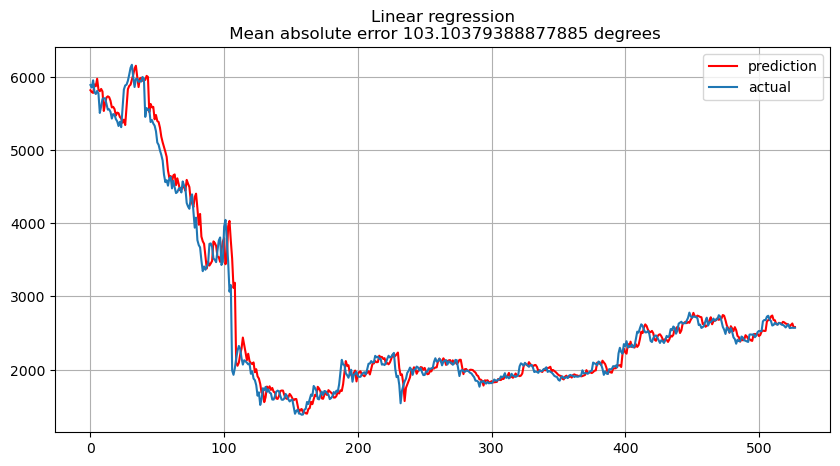

In [11]:
lr = LinearRegression()
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

plt.figure(figsize=(10, 5))
plt.plot(preds, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.grid(True)
plt.legend(loc="best")
plt.title(f"Linear regression\n Mean absolute error {mean_absolute_error(preds, y_test)} degrees");

In [12]:
print("SMAPE:", mean_absolute_percentage_error(preds, y_test))

SMAPE: 0.03795758715692147


### CatBoostRegressor

In [13]:
# cb = CatBoostRegressor(n_estimators=1000, logging_level='Silent', loss_function='MAE', depth=10, 
#                        learning_rate = 0.1)
# cb.fit(X_train, y_train)
# preds = cb.predict(X_test)

In [14]:
# plt.figure(figsize=(10, 5))
# plt.plot(preds, "r", label="prediction")
# plt.plot(y_test.values, label="actual")
# plt.grid(True)
# plt.legend(loc="best")
# plt.title(f"CatBoostRegressor\n Mean absolute error {mean_absolute_error(preds, y_test)} degrees");

In [15]:
# print("MAE:", mean_absolute_error(preds, y_test))

In [16]:
# print("SMAPE:", mean_absolute_percentage_error(preds, y_test))

In [26]:
cat = CatBoostRegressor(logging_level='Silent')
grid = {'learning_rate': [0.03, 0.1],
        'depth': [1, 2, 4, 6],
        'l2_leaf_reg': [1, 3, 7], 
       'n_estimators': [10, 100, 50]}

grid_search_result = cat.grid_search(grid, X=X_train, y=y_train, plot=True, cv=10)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	loss: 2142.6372065	best: 2142.6372065 (0)	total: 31.6ms	remaining: 2.24s
1:	loss: 1133.1395980	best: 1133.1395980 (1)	total: 43.9ms	remaining: 1.54s
2:	loss: 2145.9928840	best: 1133.1395980 (1)	total: 60.9ms	remaining: 1.4s
3:	loss: 1138.7179118	best: 1133.1395980 (1)	total: 66.9ms	remaining: 1.14s
4:	loss: 2152.5883206	best: 1133.1395980 (1)	total: 76.7ms	remaining: 1.03s
5:	loss: 1149.7550137	best: 1133.1395980 (1)	total: 84.6ms	remaining: 931ms
6:	loss: 290.5150675	best: 290.5150675 (6)	total: 155ms	remaining: 1.44s
7:	loss: 143.3577542	best: 143.3577542 (7)	total: 214ms	remaining: 1.71s
8:	loss: 291.7361257	best: 143.3577542 (7)	total: 278ms	remaining: 1.95s
9:	loss: 141.7908952	best: 141.7908952 (9)	total: 310ms	remaining: 1.92s
10:	loss: 297.5324589	best: 141.7908952 (9)	total: 345ms	remaining: 1.91s
11:	loss: 142.1702595	best: 141.7908952 (9)	total: 380ms	remaining: 1.9s
12:	loss: 770.2180453	best: 141.7908952 (9)	total: 397ms	remaining: 1.8s
13:	loss: 169.3669522	best: 141.7

In [23]:
cb = CatBoostRegressor(logging_level='Silent', loss_function='MAE', depth=6, 
                       learning_rate = 0.1, l2_leaf_reg=1, iterations=100)
cb.fit(X_train, y_train)
preds = cb.predict(X_test)

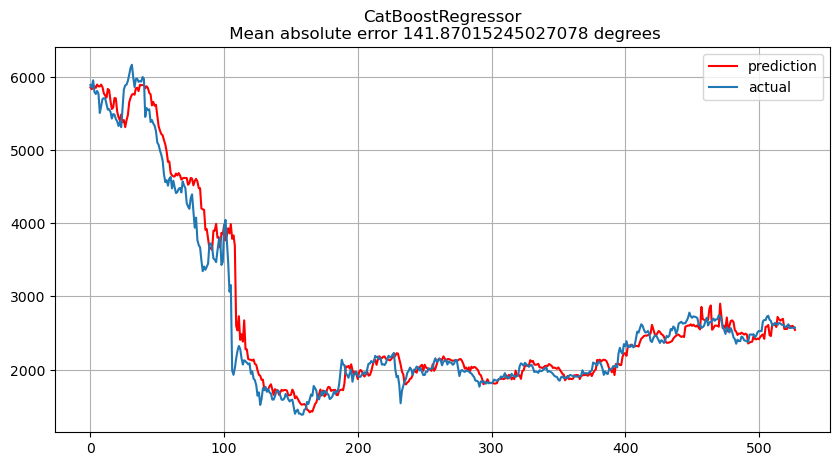

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(preds, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.grid(True)
plt.legend(loc="best")
plt.title(f"CatBoostRegressor\n Mean absolute error {mean_absolute_error(preds, y_test)} degrees");

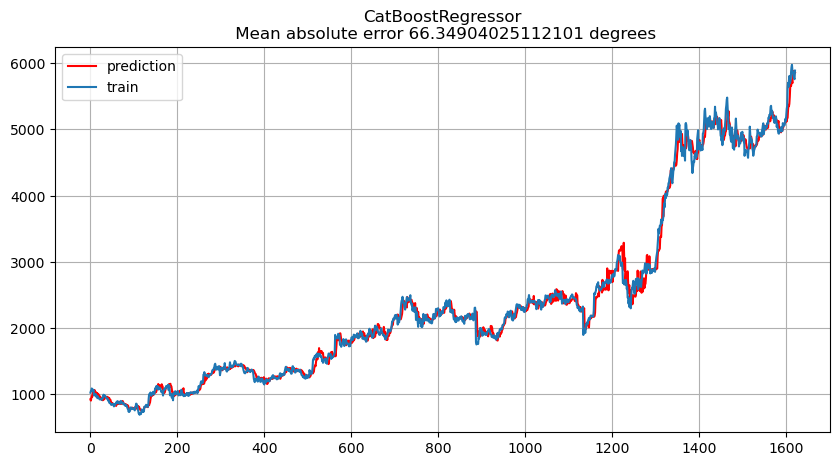

In [25]:
preds = cb.predict(X_train)
plt.figure(figsize=(10, 5))
plt.plot(preds, "r", label="prediction")
plt.plot(y_train.values, label="train")
plt.grid(True)
plt.legend(loc="best")
plt.title(f"CatBoostRegressor\n Mean absolute error {mean_absolute_error(preds, y_train)} degrees");

In [23]:
print("SMAPE:", mean_absolute_percentage_error(preds, y_test))

SMAPE: 0.04746094783323289
